In [1]:
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC,SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

In [2]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [3]:
X=df.drop('Species',axis=1)
y=df['Species']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
model=SVC(kernel='rbf')


In [6]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [7]:
print("classification_report",classification_report(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("accuracy_score",accuracy_score(y_test,y_pred))

classification_report                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

confusion_matrix [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
accuracy_score 1.0


Text(50.722222222222214, 0.5, 'actual')

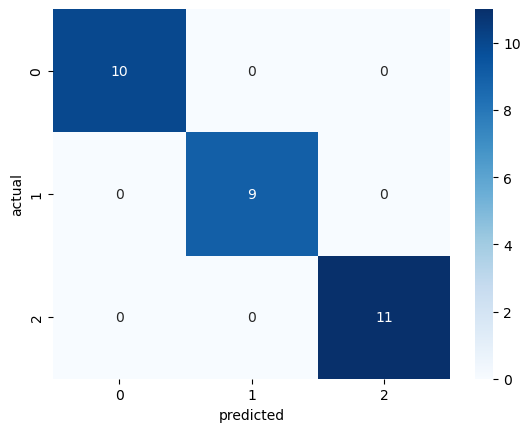

In [8]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')

## SVR

In [43]:
df=pd.read_csv("tips.csv")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [45]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])


In [46]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [51]:
X=df.drop('tip',axis=1)
y=df['tip']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
model=SVR()


In [54]:
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [55]:
print("mean_absolute_percentage_error",mean_absolute_percentage_error(y_test,y_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_pred))
print("r2_score",r2_score(y_test,y_pred))



mean_absolute_percentage_error 0.24398332511359916
mean_absolute_error 0.5707097371316318
r2_score 0.5693326496439823
